In [10]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets


In [11]:
#hàm tính tích vô hướng giữa w và x
def TinhTich(w, x):
    return np.sign(np.dot(w.T, x))
#hàm kiểm tra sự hội tụ
def ktraHoiTu(X, y, w):
    return np.array_equal(TinhTich(w, X), y)
# Thuật toán Perceptron để tìm vector trọng số tối ưu với số vòng chạy tối đa là 1000
def perceptron(X, y, w_init, max_iterations=1000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    iteration = 0

    while iteration < max_iterations:
        iteration += 1
        misclassified = False

        for i in range(N):
            xi = X[:, i].reshape(d, 1)
            yi = y[i]

            if TinhTich(w[-1], xi)[0] != yi:
                mis_points.append(i)
                w_new = w[-1] + yi * xi
                w.append(w_new)
                misclassified = True

        if not misclassified:
            break

    return (w, mis_points)





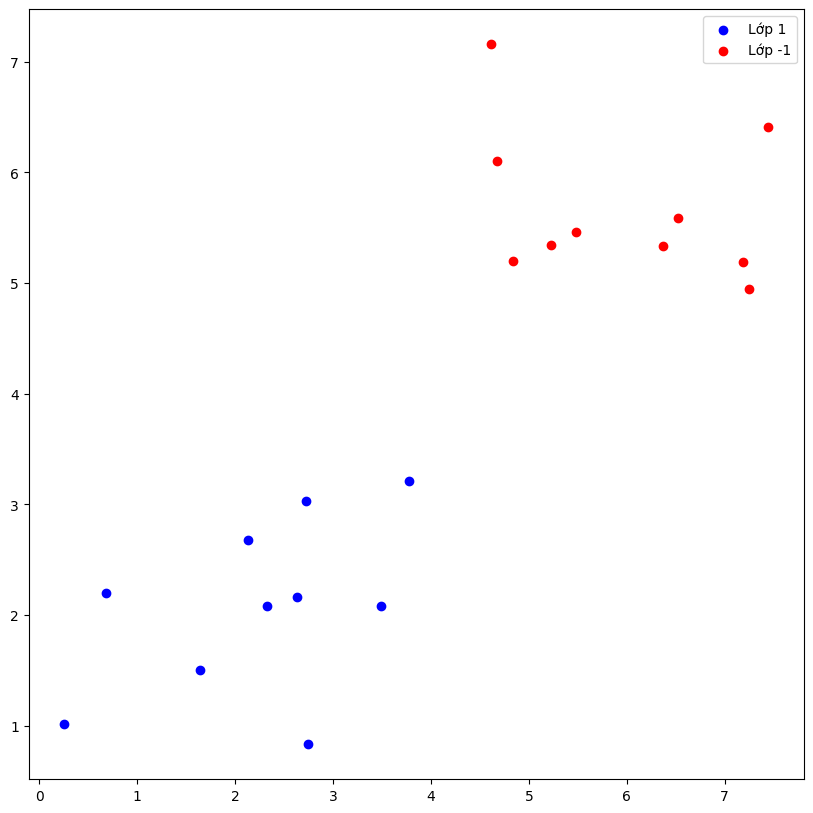

In [12]:
#Tạo bộ dữ liệu ngẫu nhiên

# Thiết lập seed cho số ngẫu nhiên để có kết quả tái lặp
np.random.seed(42)
# Tạo dữ liệu cho lớp 1
mean1 = np.array([2, 2])  # Trung bình
cov1 = np.array([[1, 0.5], [0.5, 1]])  # Ma trận hiệp phương sai
data1 = np.random.multivariate_normal(mean1, cov1, 10).T

# Tạo dữ liệu cho lớp -1
mean2 = np.array([6, 6])
cov2 = np.array([[1, -0.5], [-0.5, 1]])
data2 = np.random.multivariate_normal(mean2, cov2, 10).T

# Ghép nối dữ liệu từ hai lớp
X = np.concatenate((data1, data2), axis=1)

# Thêm cột chứa toàn bộ giá trị là 1 (để tạo bias)
X = np.vstack((np.ones(20), X))

# Tạo nhãn cho các điểm dữ liệu
y = np.concatenate((np.ones(10), -1 * np.ones(10)))

# Vẽ biểu đồ để hiển thị dữ liệu
plt.figure(figsize=(10, 10))
plt.scatter(X[1, np.where(y == 1)], X[2, np.where(y == 1)], color='blue', marker='o', label='Lớp 1')
plt.scatter(X[1, np.where(y == -1)], X[2, np.where(y == -1)], color='red', marker='o', label='Lớp -1')
plt.legend()
plt.show()


In [13]:
# khởi tạo tham số
d = X.shape[0]
w_init = np.random.randn(d, 1)

# chạy thuật toán perceptron
w, misclassified_points = perceptron(X, y, w_init)

#in kết quả
print("Final weights:", w)
print("Misclassified points:", misclassified_points)

Final weights: [array([[ 0.73846658],
       [ 0.17136828],
       [-0.11564828]]), array([[-0.26153342],
       [-4.4464545 ],
       [-7.2720492 ]]), array([[ 0.73846658],
       [-2.80748943],
       [-5.77134842]]), array([[ 1.73846658],
       [-2.12991908],
       [-3.57074822]]), array([[ 2.73846658],
       [ 0.18993217],
       [-1.48503393]]), array([[3.73846658],
       [2.32522889],
       [1.19282283]]), array([[ 2.73846658],
       [-2.29259389],
       [-5.96357808]]), array([[ 3.73846658],
       [-0.65362882],
       [-4.46287731]]), array([[ 4.73846658],
       [ 0.02394153],
       [-2.26227711]]), array([[5.73846658],
       [2.15923825],
       [0.41557966]]), array([[ 4.73846658],
       [-2.45858453],
       [-6.74082126]]), array([[ 5.73846658],
       [-0.81961946],
       [-5.24012048]]), array([[ 6.73846658],
       [-0.14204911],
       [-3.03952028]]), array([[ 7.73846658],
       [ 1.99324761],
       [-0.36166352]]), array([[ 6.73846658],
       [-2.62457

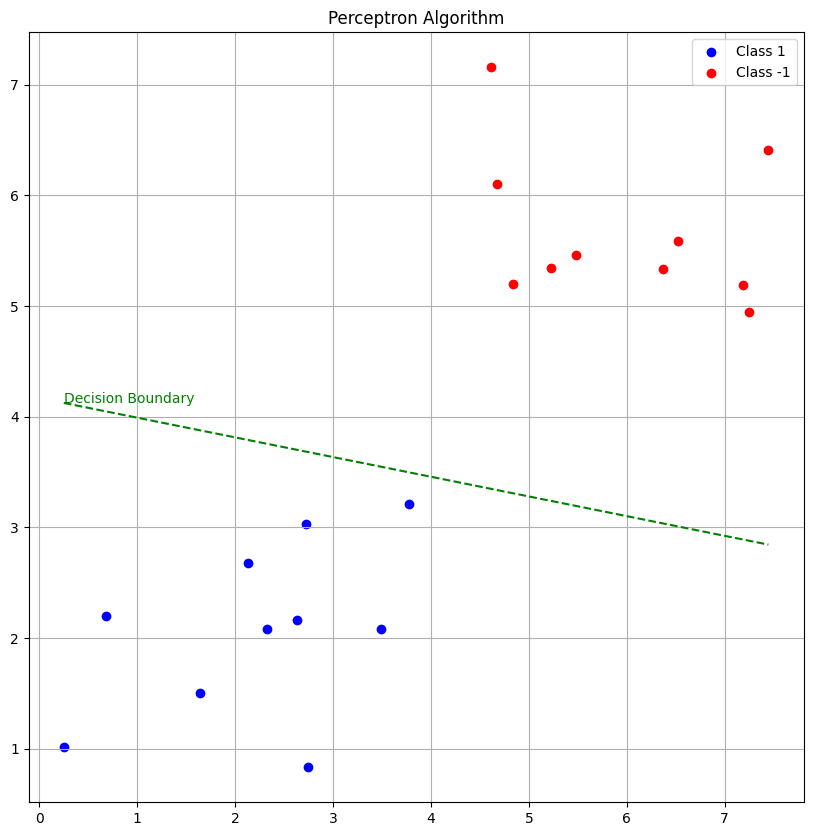

In [14]:
#biểu diễn kết quả trên.
def plot_perceptron(X, y, w):
    plt.figure(figsize=(10, 10))

    # Plot data points
    plt.scatter(X[1, np.where(y == 1)], X[2, np.where(y == 1)], color='blue', marker='o', label='Class 1')
    plt.scatter(X[1, np.where(y == -1)], X[2, np.where(y == -1)], color='red', marker='o', label='Class -1')

    # Plot decision boundary
    a, b = -w[1] / w[2], -w[0] / w[2]
    x_vals = np.array([X[1, :].min(), X[1, :].max()])
    y_vals = a * x_vals + b
    plt.plot(x_vals, y_vals, '--', color='green')

    # Add label for the decision boundary
    plt.text(x_vals[0], y_vals[0], 'Decision Boundary', color='green')

    plt.legend()
    plt.grid(True)
    plt.title('Perceptron Algorithm')
    plt.show()


plot_perceptron(X, y, w[-1])

